<a href="https://colab.research.google.com/github/nandukamankar/regression-analysis/blob/main/regression_analysis_on_rossmann_store_sales_by_nandu_final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  **PROJECT TITLE :- Sales Prediction -> Predicting the sales of Rossmann Store Cha`in.**

# Project Type :- Capstone Project - Regression 

**Contribution :- Team**

Team Member 1 :- Deepak Singh

Team Member 2 :- Nandu Kamankar

# **PROJECT SUMMARY :-**

The goal of this project is to develop a sales forecasting model for Rossmann, a leading drugstore chain operating over 3,000 stores across 7 European countries. Currently, the store managers are responsible for predicting their daily sales for up to six weeks in advance. However, the accuracy of these predictions varies due to the multitude of factors that influence store sales, such as promotions, competition, holidays, seasonality, and locality.

To address this challenge, historical sales data from 1,115 Rossmann stores has been provided. This dataset includes information about daily sales as well as other relevant features. It is worth noting that some stores in the dataset were temporarily closed for refurbishment, adding an additional complexity to the task.

The main objective is to forecast the "Sales" column for the test set, leveraging the historical sales data and associated factors. By developing an accurate and reliable sales forecasting model, Rossmann aims to improve operational efficiency, optimize inventory management, and enhance decision-making at both the store and corporate levels.

This project presents an opportunity to employ advanced data analysis and machine learning techniques to extract meaningful insights from the data and develop a robust forecasting model. The model will enable Rossmann to anticipate future sales patterns, better understand the impact of various factors on sales, and make informed business decisions to drive growth and profitability.

By successfully predicting sales with higher accuracy, Rossmann can optimize its promotional strategies, inventory allocation, and resource planning. This will not only result in improved customer satisfaction but also contribute to increased revenue and market competitiveness in the highly dynamic retail industry.

# **GitHub Link :-** https://github.com/nandukamankar/regression-analysis

# **Problem Statement:-**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **Data Description:-**

Rossmann Stores Data.csv - Historical data including Sales

store.csv  - Supplemental information about the stores


**<u>Data fields</u>**

**Most of the fields are self-explanatory.**

* **Id** - an Id that represents a (Store, Date) duple within the set
*  **Store** - a unique Id for each store
*  **Sales** - the turnover for any given day (Dependent Variable)
* **Customers** - the number of customers on a given day
* **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* **StoreType** - differentiates between 4 different store models: a, b, c, d
* **Assortment** - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
* **CompetitionDistance** - distance in meters to the nearest competitor store
* **CompetitionOpenSince**[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* **Promo** - indicates whether a store is running a promo on that day
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* **Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

##**Business Problem**
The interest in a product continues to change occasionally. No business can work on its monetary growth without assessing client interest and future demand of items precisely. 
 Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time. 
 This project involves solving a real-world business problem of sales forecasting and building up a machine learning model for the same. 

 Our goal here is to forecast the sales for six weeks for each store and find out the factors influencing it and recommend ways in order to improve the numbers.

####Approach
* Business Problem
* Data Collection and Preprocessing
    
    1. Importing important libraries and modules
    2. Data Cleaning
    3.  Missing Data Handling
    4. Merging the Datasets
* Exploratory Data Analysis
    1. Hypotheses
    2. Categorical Features
    3. Continuous Features
    4. EDA Conclusion and Validating Hypotheses
* Feature Selection and Outlier Detection
    1. Feature Engineering
    2. Outlier Detection and Treatment
* Modeling
    1. Train Test Split
    2. Baseline Model - Decision Tree
    3. Random Forest Model
    4. Random Forest Hyperparameter Tuning
    5. Random Forest Feature Importance
* Model Performance and Evaluation
    1. Visualizing Model Performances
    2. Random Forest vs Baseline Model
    3. Random Forest Tuned vs Baseline and Random Forest Models
* Store wise Sales Predictions
* Conclusion and Recommendations


In [1]:
# Importing necessary libraries and modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from scipy import stats
import warnings    
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Loading the dataset from the drive.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the csv file and converting it into pandas dataframes.

working_dir ='/content/drive/MyDrive/almabetter/project_work/REGRESSION PROJECT/'
file_name1 = 'Rossmann Stores Data.csv'
file_name2 = 'store.csv'
rossmann = pd.read_csv(working_dir+file_name1)
store = pd.read_csv(working_dir+file_name2)

# **DATA EXPLORATION**

**We have two Datasets.**

1. **Historical Sales Dataset :- rossmann**
2. **Stores Dataset :- store**

**First we look at the Historical Sales Dataset.**

In [4]:
# Looking at the first 5 Rows of the Historical Dataset.

rossmann.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
# Looking at the last 5 Rows of the Historical Dataset.

rossmann.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
# Checking the shape of the Historical Dataset.

rossmann.shape

(1017209, 9)

We have  total 10,17,209 Rows and 9 Columns is this dataset.

In [7]:
# Checking the information about the Historical Datset.

rossmann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


There are total 1017209 rows/observations and 9 columns in this dataset.There seems to be no Null values present in it. It has integer, datetime and object as data types.

**Now we look at the Store Dataset:-**

In [8]:
# Looking at the first 5 Rows of the Store Dataset.

store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
# Looking at the last 5 Rows of the Store Dataset.

store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [10]:
# Checking the Shape of the Store Dataset.

store.shape

(1115, 10)

We have  total 1,115 Rows and 10 Columns is this dataset.

In [11]:
# Checking the information about the Store Dataset.

store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


There are 1115 rows/observations and 10 columns. There are missing values in it and it is important to impute them with appropriate values in order to get good results later on.

**HANDLING MISSING/NaN VALUES.**

In [12]:
# Analyzing the total missing values in the store dataset.

store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Out of 1115 entries there are missing values for the columns:
* CompetitionDistance - distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

* CompetitionOpenSinceMonth - gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month    
* CompetitionOpenSinceYear -  gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month    
* Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.  

In [13]:
# define a function to find the number and percentage of missing values in a Store Dataset.

def get_missing_values_count_and_percentage(dataframe):
  num = 0
  for column in dataframe.columns:
    count = dataframe[column].isnull().sum()
    percentage = count/dataframe.shape[0]*100
    if percentage > 0:
      num += 1
      print(f"{column}: {count}({round(percentage, 2)})%")
  if num == 0:
    print("No missing values in the dataframe")

In [14]:
# Finding the number and percentage of missing values in Store dataset.

get_missing_values_count_and_percentage(store)

CompetitionDistance: 3(0.27)%
CompetitionOpenSinceMonth: 354(31.75)%
CompetitionOpenSinceYear: 354(31.75)%
Promo2SinceWeek: 544(48.79)%
Promo2SinceYear: 544(48.79)%
PromoInterval: 544(48.79)%


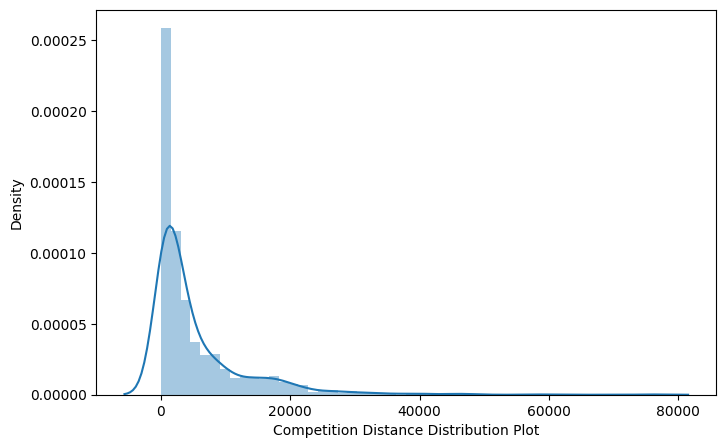

In [15]:
# Distrubution Plot for visualization of CompetitionDistance.

sns.distplot(x = store["CompetitionDistance"], hist = True)
plt.xlabel("Competition Distance Distribution Plot")
plt.show()

The distribution of CompetitionDistance is positively skewed. So it is safe to impute missing values with mode or median. Since the PDF of the peak of the distribution is very low, it is better to go with median instead of mode

In [16]:
# Filling competition distance with the median value.

store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

Both CompetitionOpenSinceMonth and CompetitionOpenSinceYear have the same number of missing values. This may mean that both the features have missing values in the same rows.

In [17]:
# Check if CompetitionOpenSinceMonth and CompetitionOpenSinceYear have missing values in the same rows

count = 0
for index, row in store.iterrows():
  if np.isnan(row["CompetitionOpenSinceMonth"]) and np.isnan(row["CompetitionOpenSinceYear"]):
    count += 1

print(count)

354


So, both the features have missing values in the same rows. Now lets check if its related to CompetitionDistance.

In [18]:
# Show CompetitionDistance, CompetitionOpenSinceMonth and CompetitionOpenSinceYear for rows
# where CompetitionOpenSinceMonth and CompetitionOpenSinceYear have missing values.

store[np.isnan(store["CompetitionOpenSinceMonth"])].loc[:, 
 ["CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]]

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
11,1070.0,NaN,NaN
12,310.0,NaN,NaN
15,3270.0,NaN,NaN
18,3240.0,NaN,NaN
21,1040.0,NaN,NaN
...,...,...,...
1095,1130.0,NaN,NaN
1099,540.0,NaN,NaN
1112,9260.0,NaN,NaN
1113,870.0,NaN,NaN


Since no useful information was obtained from the above process, lets impute missing values with the most frequent values.

In [19]:
# Filling the missing values with mode.

store["CompetitionOpenSinceMonth"].fillna(value = store.CompetitionOpenSinceMonth.mode()[0], inplace=True)

store["CompetitionOpenSinceYear"].fillna(value = store.CompetitionOpenSinceYear.mode()[0], inplace=True)

Promo2SinceWeek, Promo2SinceYear and PromoInterval have the same number of missing values. This may mean that these features have missing values in the same rows.

In [20]:
# check if Promo2SinceWeek, Promo2SinceYear and PromoInterval have missing values in the same rows

count = 0
for index, row in store.iterrows():
  if np.isnan(row["Promo2SinceWeek"]) and np.isnan(row["Promo2SinceYear"]) and np.isnan(row["PromoInterval"]):
    count += 1

print(count)

544


So, these features have missing values in the same rows. Now lets check if its related to Promo2.

In [21]:
# Show Promo2, Promo2SinceWeek, Promo2SinceYear and PromoInterval for rows
# where Promo2SinceWeek, Promo2SinceYear and PromoInterval have missing values

store[np.isnan(store["Promo2SinceWeek"])].loc[:, ["Promo2", "Promo2SinceWeek", "Promo2SinceYear", "PromoInterval"]]

,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN
5,0,NaN,NaN,NaN
6,0,NaN,NaN,NaN
...,...,...,...,...
1107,0,NaN,NaN,NaN
1109,0,NaN,NaN,NaN
1111,0,NaN,NaN,NaN
1112,0,NaN,NaN,NaN


Promo2 value of head and tail of the above dataframe is 0. Lets check whether missing values in Promo2SinceWeek, Promo2SinceYear and PromoInterval is due to 0 in Promo2.

In [22]:
# Show the count of each unique value in Promo2.

store["Promo2"].value_counts()

1    571
0    544
Name: Promo2, dtype: int64

So, missing values in Promo2SinceWeek, Promo2SinceYear and PromoInterval is due to 0 in Promo2. Lets impute missing values with 0.

In [23]:
# filling the missing values with value 0.

store["Promo2SinceWeek"].fillna(value = 0, inplace=True)

store["Promo2SinceYear"].fillna(value = 0, inplace=True)

store["PromoInterval"].fillna(value = 0, inplace=True)

Finally checking if any missing values left in Store Dataset.

In [24]:
# Finding the number and percentage of missing values in Store dataset.

get_missing_values_count_and_percentage(store)

No missing values in the dataframe


Since all the Dataset doesnot contain any missing values. Let's merge our two dataset to form a combine one Dataset.

In [25]:
# Merge the two datasets on Store data.

df = rossmann.merge(right=store, on="Store", how="left")